In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex
import warnings

In [2]:
df=pd.read_csv('E:/datasets/netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['rating']=df['rating'].fillna('NC-17')

In [6]:
df['date_added']=pd.to_datetime(df['date_added'])

In [7]:
df['added_year']=df['date_added'].dt.year
df['added_month']=df['date_added'].dt.month


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month'],
      dtype='object')

In [9]:
len(df.show_id.unique())

8807

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_year    8797 non-null   float64       
 13  added_month   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_year    8797 non-null   float64       
 13  added_month   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [12]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
273 min         1
43 min          1
230 min         1
5 min           1
229 min         1
Name: duration, Length: 220, dtype: int64

In [13]:
df['type']

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [14]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [15]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
NC-17          7
TV-Y7-FV       6
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

In [16]:
df.country.value_counts()

United States                           2818
India                                    972
United Kingdom                           419
Japan                                    245
South Korea                              199
                                        ... 
United Kingdom, Pakistan                   1
France, Canada, China, Cambodia            1
United States, United Kingdom, Japan       1
United States, Singapore                   1
Japan, Canada, United States               1
Name: country, Length: 748, dtype: int64

In [17]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [18]:
df.iloc[np.where(df['title']=='Peaky Blinders')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
3452,s3453,TV Show,Peaky Blinders,NaN,"Cillian Murphy, Sam Neill, Helen McCrory, Paul...",United Kingdom,2019-10-04,2019,TV-MA,5 Seasons,"British TV Shows, Crime TV Shows, Internationa...","A notorious gang in 1919 Birmingham, England, ...",2019.0,10.0


In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
added_year        10
added_month       10
dtype: int64

In [20]:
df=df.dropna(axis=0)

In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [22]:
df['director'].mode()

0    Raúl Campos, Jan Suter
dtype: object

In [23]:
df['cast']=df['cast'].fillna('Not Available')

<ipython-input-23-aa757b412b32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast']=df['cast'].fillna('Not Available')


In [24]:
df['director']=df['director'].fillna('Not Available')

<ipython-input-24-74d0aada800f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director']=df['director'].fillna('Not Available')


In [25]:
df['country']=df['country'].fillna('Not Available')

<ipython-input-25-d5927991320f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']=df['country'].fillna('Not Available')


In [26]:
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

<ipython-input-26-834b64c0955f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])


In [27]:
df['duration'].unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [28]:
df.groupby(['country'])['director'].value_counts()

country            director              
, France, Algeria  Najwa Najjar              1
Argentina          Raúl Campos, Jan Suter    5
                   Alejandro Doria           2
                   Sebastián Schindel        2
                   Alejandro Montiel         1
                                            ..
Vietnam            Le Van Kiet               1
                   Nguyen Thanh Tung         1
                   Van M. Pham               1
                   Victor Vu                 1
Zimbabwe           Tomas Brickhill           1
Name: director, Length: 4293, dtype: int64

<AxesSubplot:xlabel='type', ylabel='Count'>

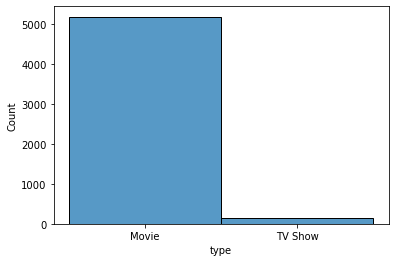

In [29]:
sns.histplot(df['type'])

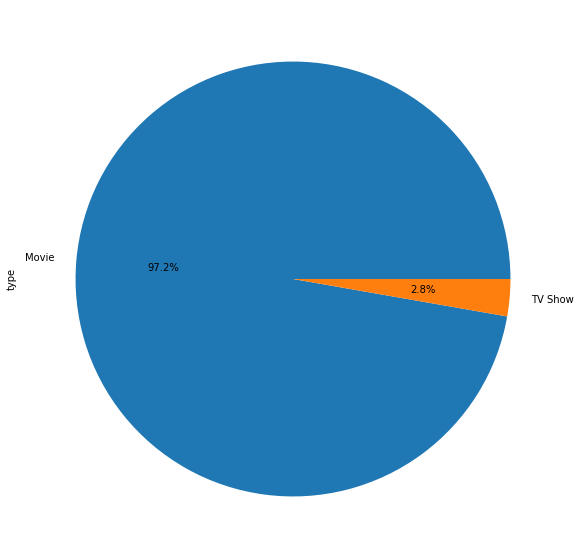

In [30]:
# insight 2
s=df['type'].value_counts()
s.plot.pie(autopct="%.1f%%",figsize=(10,10));

<AxesSubplot:xlabel='rating', ylabel='Count'>

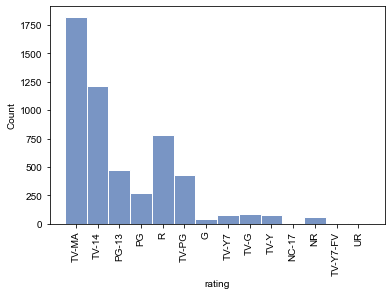

In [31]:
# insight 3
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,20)})
sns.histplot(df['rating'])

In [32]:
# insight 4
i=df[df['country' ]=='India']
i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021.0,9.0
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2021.0,9.0
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021.0,9.0
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017.0,5.0
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018.0,1.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0,12.0
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018.0,2.0


In [33]:
# indian movies and shows
i['type'].value_counts()

Movie      868
TV Show      7
Name: type, dtype: int64

In [34]:
# indian show on netflix
i[i['type']=='TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-08-06,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",2021.0,8.0
1293,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Manchu Lakshmi, Saanve Megghana, Naveen Kumar,...",India,2021-02-19,2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From secrets and lies to jealousy and control,...",2021.0,2.0
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,2020-12-18,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020.0,12.0
3036,s3037,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,2020-01-10,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,2020.0,1.0
4685,s4686,TV Show,GHOUL,Patrick Graham,"Radhika Apte, Manav Kaul, Ratnabali Bhattachar...",India,2018-08-24,2018,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",When a new prisoner at a military detention ce...,2018.0,8.0
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019.0,7.0
8172,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2018-03-31,2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising...",2018.0,3.0


In [35]:
# Indian movies on Netflix.
i[i['type']=='Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021.0,9.0
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2021.0,9.0
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021.0,9.0
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017.0,5.0
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018.0,1.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0,12.0
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018.0,2.0


<AxesSubplot:xlabel='rating', ylabel='Count'>

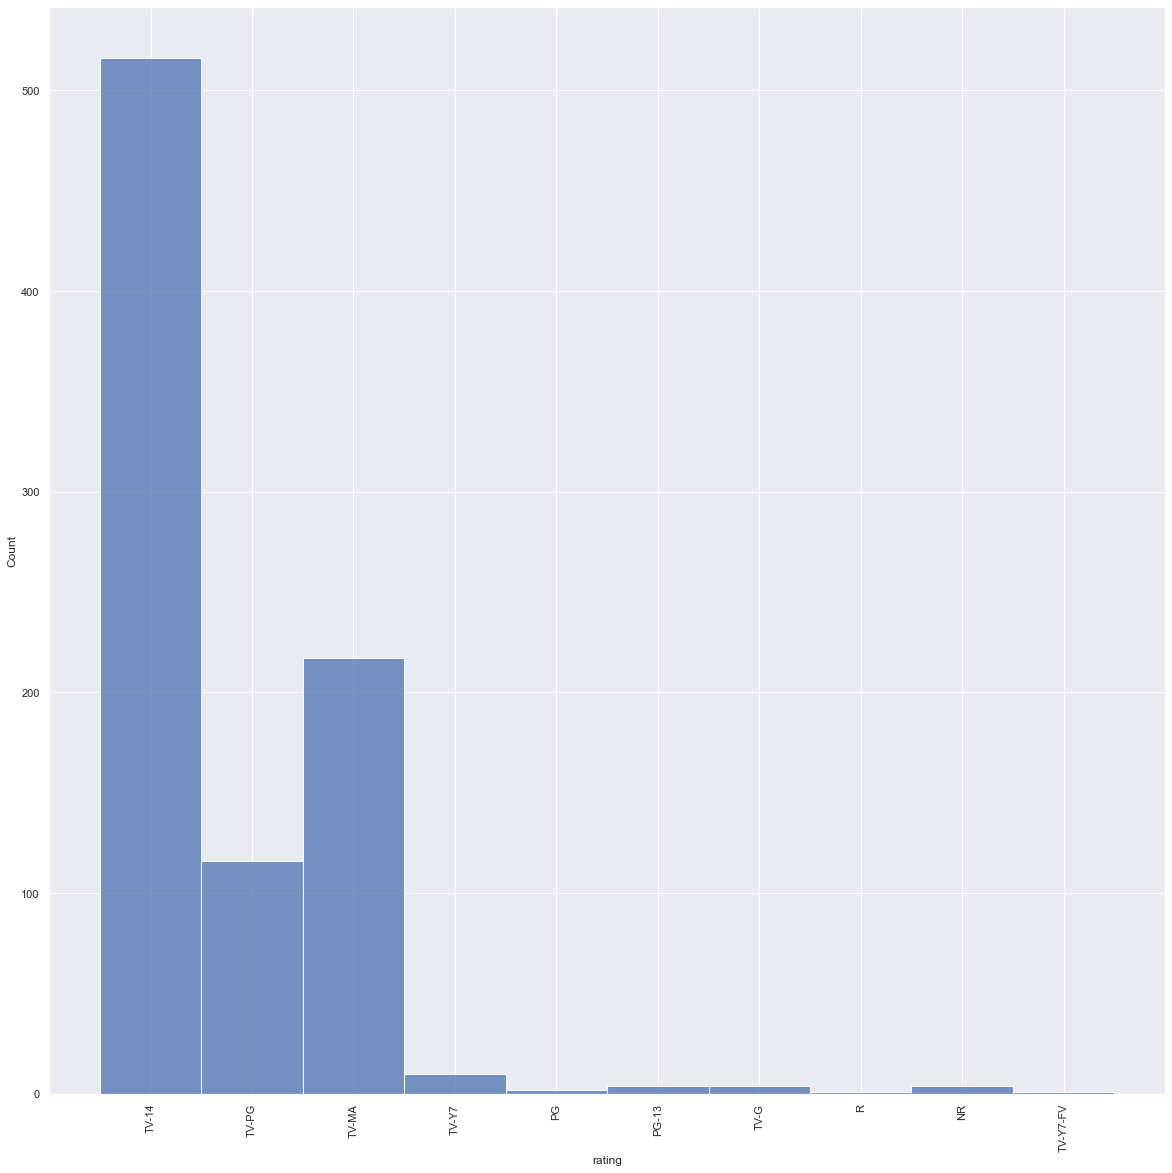

In [36]:
# indian movies
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(i['rating'])

In [37]:
#insight 5
i.groupby(['title','rating'])['date_added'].max()

title                 rating
1000 Rupee Note       TV-14    2016-12-01
15 August             TV-14    2019-03-29
15-Aug                TV-14    2019-03-29
1920                  TV-MA    2017-12-15
2 States              TV-PG    2018-08-04
                                  ...    
Zubaan                TV-14    2019-03-02
​Goli Soda 2          TV-14    2018-09-15
​Maj Rati ​​Keteki    TV-14    2018-09-15
​Mayurakshi           TV-14    2018-09-15
​​Kuch Bheege Alfaaz  TV-14    2018-09-01
Name: date_added, Length: 875, dtype: datetime64[ns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5333 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5333 non-null   object        
 1   type          5333 non-null   object        
 2   title         5333 non-null   object        
 3   director      5333 non-null   object        
 4   cast          5333 non-null   object        
 5   country       5333 non-null   object        
 6   date_added    5333 non-null   datetime64[ns]
 7   release_year  5333 non-null   int64         
 8   rating        5333 non-null   object        
 9   duration      5333 non-null   object        
 10  listed_in     5333 non-null   object        
 11  description   5333 non-null   object        
 12  added_year    5333 non-null   float64       
 13  added_month   5333 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 625.0+ KB


In [39]:
zx=df['added_year'].value_counts()

In [40]:
zx.sort_values()

2008.0       1
2010.0       1
2009.0       2
2012.0       3
2013.0       7
2011.0      13
2014.0      14
2015.0      50
2016.0     202
2017.0     725
2021.0     755
2018.0    1101
2020.0    1194
2019.0    1265
Name: added_year, dtype: int64

<AxesSubplot:xlabel='added_year', ylabel='Count'>

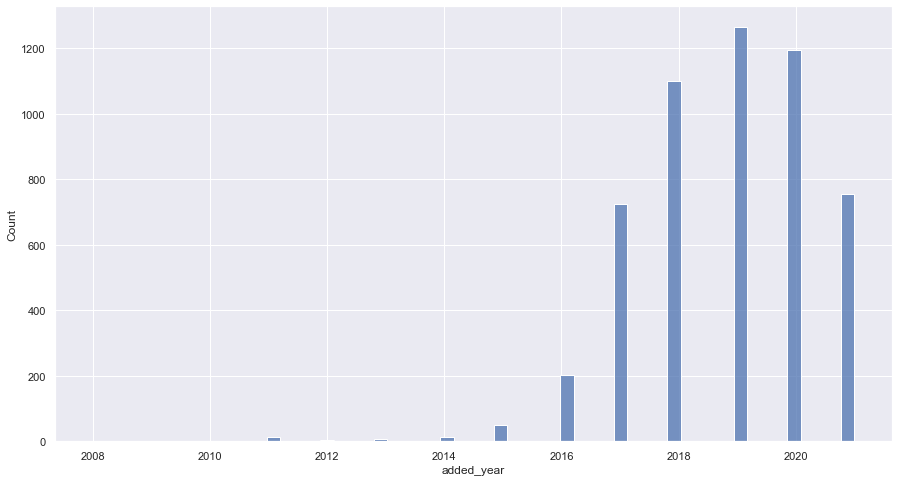

In [41]:
sns.histplot(df['added_year'])

In [42]:
df.groupby(['title','added_year'])['added_month'].value_counts()

title                          added_year  added_month
#Alive                         2020.0      9.0            1
#AnneFrank - Parallel Stories  2020.0      7.0            1
#FriendButMarried              2020.0      5.0            1
#FriendButMarried 2            2020.0      6.0            1
#Roxy                          2019.0      4.0            1
                                                         ..
​Goli Soda 2                   2018.0      9.0            1
​Maj Rati ​​Keteki             2018.0      9.0            1
​Mayurakshi                    2018.0      9.0            1
​​Kuch Bheege Alfaaz           2018.0      9.0            1
반드시 잡는다                        2018.0      2.0            1
Name: added_month, Length: 5333, dtype: int64

<AxesSubplot:ylabel='added_month'>

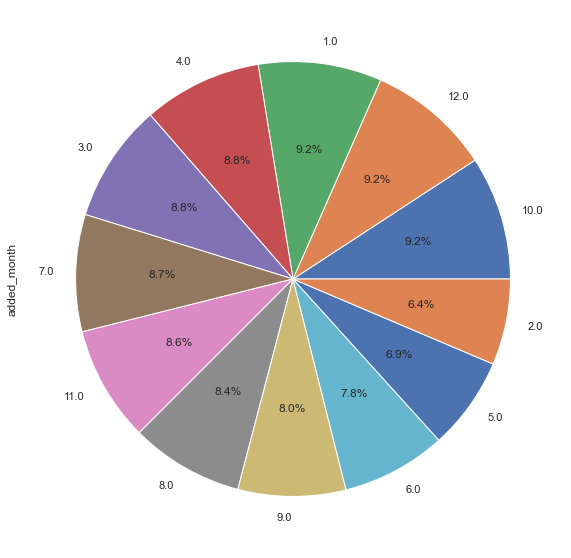

In [43]:
q=df['added_month'].value_counts()
q.plot.pie(autopct='%.1f%%',figsize=(20,10))

In [44]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month'],
      dtype='object')

In [45]:
df[df['duration']=='9 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0
1998,s1999,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020-09-15,2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...,2020.0,9.0
3541,s3542,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,2019-09-01,2006,TV-14,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane...",2019.0,9.0


In [46]:
df['duration'].unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [47]:
# insight
i['director'].value_counts()

David Dhawan          9
Ram Gopal Varma       7
Anees Bazmee          6
Sooraj R. Barjatya    6
Imtiaz Ali            6
                     ..
Aatmaram Dharne       1
Atanu Mukherjee       1
Aanand Rai            1
Sushil Majumdar       1
Supavitra Babul       1
Name: director, Length: 631, dtype: int64

In [48]:
# insight
i.groupby(['type','title'])['added_year'].max()

type     title                                
Movie    1000 Rupee Note                          2016.0
         15 August                                2019.0
         15-Aug                                   2019.0
         1920                                     2017.0
         2 States                                 2018.0
                                                   ...  
TV Show  Jamtara - Sabka Number Ayega             2020.0
         Navarasa                                 2021.0
         Paava Kadhaigal                          2020.0
         Pitta Kathalu                            2021.0
         Th Eena Meena Deeka Chase Comedy Show    2018.0
Name: added_year, Length: 875, dtype: float64

In [49]:
f=df.iloc[np.where(df['type']=='TV Show')]

In [50]:
# most old movie
print(df['release_year'].min())
df[df['release_year']==1942]

1942


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017.0,3.0


In [51]:
# first movie that had been added to netflix
df['added_year'].min()
df[df['added_year']==2008]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,1.0


In [52]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [53]:
df['director'].value_counts()

Raúl Campos, Jan Suter        18
Marcus Raboy                  15
Jay Karas                     14
Cathy Garcia-Molina           13
Martin Scorsese               12
                              ..
Carlos Moreno                  1
Chris Baugh                    1
Cheng Wei-hao                  1
Jani Lachauer, Jakob Schuh     1
Philipp Eichholtz              1
Name: director, Length: 3946, dtype: int64

In [54]:
i['director'].value_counts()

David Dhawan          9
Ram Gopal Varma       7
Anees Bazmee          6
Sooraj R. Barjatya    6
Imtiaz Ali            6
                     ..
Aatmaram Dharne       1
Atanu Mukherjee       1
Aanand Rai            1
Sushil Majumdar       1
Supavitra Babul       1
Name: director, Length: 631, dtype: int64

In [55]:
i['director'].unique()

array(['S. Shankar', 'Lijo Jose Pellissery', 'Rahul Rawail',
       'Nagesh Kukunoor', 'Shanker Raman', 'Vidhu Vinod Chopra',
       'Sharan Koppisetty', 'Sachin Yardi', 'Saurabh Kabra',
       'Partho Mitra', 'Santram Varma', 'Anil V. Kumar, Anurag Basu',
       'Sangeeth Sivan', 'Umesh Ghadge', 'David Dhawan',
       'Dibakar Banerjee', 'Apoorva Lakhia', 'Milan Luthria',
       'Pawan Kripalani', 'Bhushan Patel', 'Raj Nidimoru, Krishna D.K.',
       'Mani Ratnam',
       'Bejoy Nambiar, Priyadarshan, Karthik Narain, Vasanth Sai, Karthik Subbaraj, Arvind Swamy, Rathindran R Prasad, Sarjun, Gautham Vasudev Menon',
       'Rohit Shetty', 'Ram Gopal Varma', 'Rajiv Chilaka', 'Hardik Mehta',
       'Rajveer Singh Maan, Harpeet Singh', 'Pramod Pawar',
       'Naresh Saigal', 'Vinil Mathew', 'Prabhakaran',
       'Vishwesh Krishnamoorthy', 'Kaashvie Nair', 'Nikhil Pherwani',
       'Praveen Kandregula', 'Aditya Kripalani', 'Martin Prakkat',
       'Ivan Ayr', "Stanley Menino D'Costa", 'Chait

<AxesSubplot:>

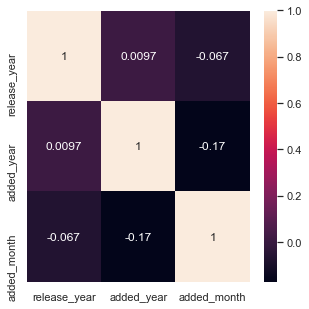

In [67]:
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, ax=ax)